### Блок теоретических вопросов

*Почему считается, что деревья склонны к переобучению?*: 

1. Это было замечено эмпирически.
2. Потому что деревья очень мощны, то есть могут восстановить практически любую зависимость в данных.
3. Из-за связи деревьев с линейными моделями, то есть дерево – это, по сути, линейная модель над какими-то признаками.





**Ответ: 2)** Факт, показанный как на практике и лекциях, так и в домашнем задании. Деревья разбивают сколько угодно сложным образом признаковое пространство на простые кусочки.

___________________________________________

*Как снижение минимального количества объектов в листовой вершине повлияет на качество на обучающей и тестовой выборках*: 

1.	Ошибка на обучающей и тестовых выборках будет падать
2.	Ошибка на обучающей выборке будет уменьшаться, а на тестовой падать до какого-то момента, а затем увеливаться
3.	Нельзя точно определить
4.	Ошибка на тестовой выборке будет падать, насчет ошибки на обучающей выборке нельзя сказать точно





**Ответ: 2)** Чем больше минимальное количество обхектов в листовой вершине, тем более "общее" разделение мы требуем от требования. То есть улавливание более общих, нежели шумящих и частных закономерностей.

___________________________________________

*Представим, что у нас имеются 2 дерева, уже обученных на одних и тех же данных. Отличаются они значениями гиперпараметров. Для первого дерева значения следующие: максимальная глубина = 8, минимальное количество объектов в листовой вершине=7. Для второго: максимальная глубина = 15, минимальное количество объектов в листовой вершине=5. Какое из них, по вашему мнению, выдаст худшее качество на тестовой выборке?*: 

1.	Второе, так как максимальная глубина значительно больше, дерево успеет подогнаться под выбросы и тд.
2.	Первое, так как глубина недостаточно большая, данные могут оказаться сложными, дерево не успеет повторить зависимость. 
3.	Вопрос некорректен, так как мы не знаем, как устроены данные. Нам может хватить глубины 8, а может не хватить и 15. 
4.	Второе, так как такая большая глубина и малое количество объектов в листе почти что гарантируют переобучение






**Ответ: 3)** В машинном обучении, в действительности, не бывает идеального рецепта или элексира. Каждая крупица данных требует индивидуального подхода и тонны экспериментов!

___________________________________________

### Блок практики

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

### Загрузим датасет с машинами. Цель - верно восстанавливать для каждой из них цену продажи!

In [2]:
data = pd.read_csv('autos.csv')

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
### Колонка с тергетом - "selling price"

X = data.drop("selling_price", axis=1)
y = data["selling_price"]

### Будем замерять MSLE!
### Поэтому прологарифмируем таргет
### А после оптимизируем MSE

y = y.apply(np.log1p)

In [4]:
### Разделим выборку на трейн и тест!

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

__Задание__ 

Реализуйте свой MeanTargetEncoder с добавленем некоторого шума!

Однажды в лекционном материале, обсуждая счетчики, мы говорили с вами о том, что из-за них модели могут переобучаться. Один из способов бороться с этим - валидировать расчеты среднего таргета (стратегия отложенной выборки / расчеты на кросс-валидации). Но есть еще проще!

Можно просто к значению счетчика добавить случайный шум (зашумить данные)!

Напомним, что рассчитываться новые признаки должны по такой формуле:

$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]} + C * \epsilon
$$


Пусть шум будет случайной величиной из нормального стандартного распределения, то есть $\epsilon \sim N(0, 1) $, а $ C = 0.006$.

Создавай свой класс-трансформер, наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`. Трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и список из числовых признаков. На выходе должен получиться датасет того же размера с измененными категориальными признаками

In [5]:
### Разделим колонки на вещественные и категориальные

object_cols = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner']
num_cols = ['km_driven']

X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


In [6]:
### Применим ко всем категориальным колонкам object type

X[object_cols] = X[object_cols].astype(object)
X_test[object_cols] = X_test[object_cols].astype(object)
X_train[object_cols] = X_train[object_cols].astype(object)

In [7]:
np.random.seed(1)

### Функция считает среднее и добавляет шум из стандартного нормального распределения

def func1(x):
    return np.sum(x) / x.size + 0.006 * np.random.normal(loc = 0.0, scale = 1.0, size =1)[0]

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
import itertools

### Реализуем класс, считающий средние значения по таргету
### И немного зашумляющий их
### Данная реализация не претендует на звание самой лучшей!
### Любые другие, работающие за адекватное время, тоже подойдут
### Советуем потыкать и разобраться, если самостоятельно во время 
### Выполнения ДЗ не получилось!

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric):
        self.categorical = categorical
        self.numeric = numeric
    
    def fit(self, X, y):

        X['y'] = y
        
        arr = []
        
        for i in self.categorical:
            
            temp = X.groupby(i).agg({'y':[func1]}).reset_index()
            arr.append((list(temp[i]), list(temp['y']['func1'])))
            
        
        self.arr = arr

        return self
        
    def transform(self, df):
        
        arr = self.arr
        
        temp = pd.DataFrame()
        
        c = 0
        
        for i in self.categorical:
            
            setik = set(df[i].unique())
            setik.difference_update(set(arr[c][0]))

            column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
            column = column.replace(list(setik), 0).reset_index()[i]

            temp = pd.concat([temp, column], axis=1)
            
            c+=1        

        temp = pd.concat([df[self.numeric].reset_index(drop=True), temp], axis=1)
        
        return temp

In [9]:
### Проверим работоспособность

np.random.seed(1)
transformer = MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)

transformer.fit(X_train, y_train)

train = transformer.transform(X_train)
test = transformer.transform(X_test)

train

,km_driven,name,year,fuel,seller_type,transmission,owner
0,50000,13.483692,13.436559,13.093756,12.615863,13.771135,12.977730
1,70000,12.117029,11.903115,12.453832,12.615863,13.771135,12.977730
2,50000,12.310456,13.328864,12.453832,12.615863,12.639805,12.977730
3,92198,12.491443,13.042359,12.453832,13.152824,12.639805,12.463313
4,3240,12.390906,12.870886,12.453832,12.615863,12.639805,12.463313
...,...,...,...,...,...,...,...
3467,40000,11.853634,11.903115,12.453832,12.615863,12.639805,12.977730
3468,15000,13.135766,13.545966,12.453832,12.615863,12.639805,12.977730
3469,11918,13.303397,13.042359,12.453832,13.646337,12.639805,12.977730
3470,90000,13.909706,13.042359,13.093756,12.615863,12.639805,12.463313


Обучите несколько деревьев, перебирая максимальную глубину алгоритма из списка `max_depth_list`, а остальные параметры оставьте дефолтными. Выведите лучшее значение гиперпараметра. Постройте график зависимости MSLE на тестовой выборке от значения гиперпараметра. Воспользуйтесь `Pipeline` без `GridSearch`. Проделайте то же самое с `min_samples_split`, `min_impurity_decrease`, `max_leaf_nodes`.

In [10]:
### Зададим сетку параметров

max_depth_list = [3, 5, 8, 12]
min_samples_split_list = [10, 50, 100, 500]
min_impurity_decrease_list = [0, 0.1, 0.15, 0.2]
max_leaf_nodes_list = [100, 200, 500]

In [11]:
### Найдем лучшую глубину (при прочих дефолтных параметрах)

from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
np.random.seed(1)
rmse1 = []


for max_depth in max_depth_list:

    pipe = Pipeline([("custom_transformer",
                  MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),
                  
                  
                 ("decision_tree", 
                  DecisionTreeRegressor(max_depth=max_depth))])

    pipe.fit(X_train, y_train)
    
    preds = pipe.predict(X_test)

    rmse1.append(mse(preds, y_test, squared=True))

In [12]:
### Найдем лучшее минимальное количество объектов в вершине (при прочих дефолтных параметрах)

rmse2 = []
np.random.seed(1)

for min_samples_split in min_samples_split_list:

    pipe = Pipeline([("custom_transformer",
                  MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),
                  
                  
                 ("decision_tree", 
                  DecisionTreeRegressor(min_samples_split=min_samples_split))])

    pipe.fit(X_train, y_train)
    
    preds = pipe.predict(X_test)

    rmse2.append(mse(preds, y_test, squared=True))

In [13]:
### Найдем лучшее максимальное количество листьев (при прочих дефолтных параметрах)

rmse3 = []
np.random.seed(1)

for max_leaf_nodes in max_leaf_nodes_list:

    pipe = Pipeline([("custom_transformer",
                  MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),
                  
                  
                 ("decision_tree", 
                  DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes))])

    pipe.fit(X_train, y_train)
    
    preds = pipe.predict(X_test)

    rmse3.append(mse(preds, y_test, squared=True))

In [14]:
### Найдем лучшее минимальное улучшения критерия качества 
### при выборе предиката (при прочих дефолтных параметрах)

rmse4 = []
np.random.seed(1)

for min_impurity_decrease in min_impurity_decrease_list:

    pipe = Pipeline([("custom_transformer",
                  MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),
                  
                  
                 ("decision_tree", 
                  DecisionTreeRegressor(min_impurity_decrease=min_impurity_decrease))])

    pipe.fit(X_train, y_train)
    
    preds = pipe.predict(X_test)

    rmse4.append(mse(preds, y_test, squared=True))

Изобразим результаты качества в зависимости от изменения отдельных параметров

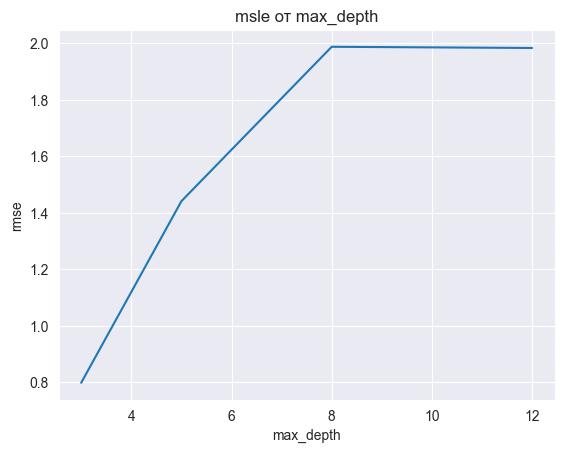

In [15]:
plt.plot(max_depth_list, rmse1)
plt.title('msle от max_depth')
plt.xlabel('max_depth')
plt.ylabel('rmse');

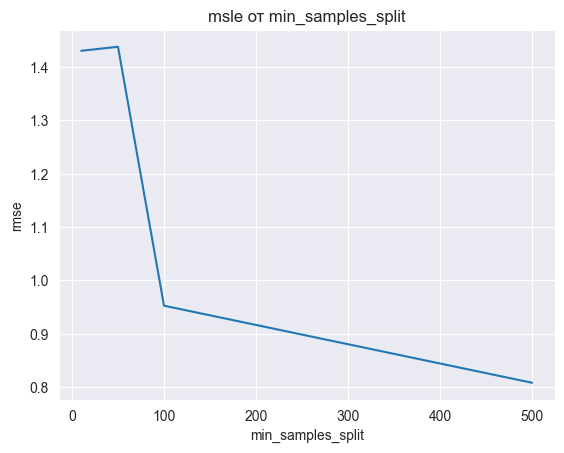

In [16]:
plt.plot(min_samples_split_list, rmse2)
plt.title('msle от min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('rmse');

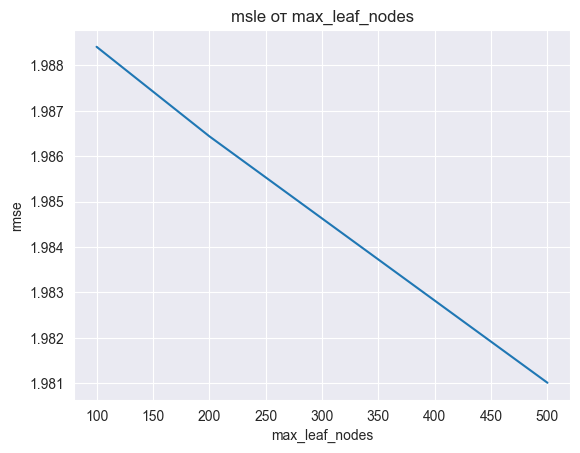

In [17]:
plt.plot(max_leaf_nodes_list, rmse3)
plt.title('msle от max_leaf_nodes')
plt.xlabel('max_leaf_nodes')
plt.ylabel('rmse');

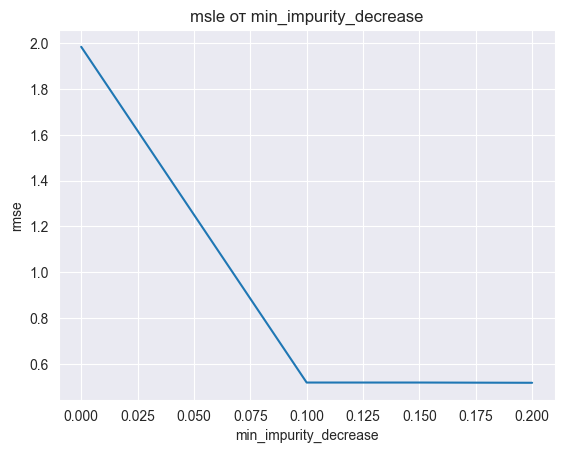

In [18]:
plt.plot(min_impurity_decrease_list, rmse4)
plt.title('msle от min_impurity_decrease')
plt.xlabel('min_impurity_decrease')
plt.ylabel('rmse');

Подберите лучшую комбинацию параметров, используя `GridSearchCV` и набор массивов значений параметров из предыдущего задания. Для лучшей комбинации посчитайте MSLE на тестовой выборке. Получились ли лучшие параметры такими же, как если бы вы подбирали их по-отдельности при остальных гиперпараметрах по умолчанию (предыдущее задание)?

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

param_grid = {
    "decision_tree__max_depth": [3, 5, 8, 12],
    "decision_tree__min_samples_split": [10, 50, 100, 500],
    "decision_tree__min_impurity_decrease": [0, 0.1, 0.15, 0.2],
    "decision_tree__max_leaf_nodes": [100, 200, 500]
}
np.random.seed(1)

pipe = Pipeline([("custom_transformer",
                  MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),
                  
                  
                 ("decision_tree", 
                  DecisionTreeRegressor())])

search = GridSearchCV(pipe, 
                      param_grid, 
                      cv=4,
                      scoring='neg_mean_squared_error',
                      verbose=10)

search.fit(X_train, y_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits
[CV 1/4; 1/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 1/4; 1/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.050 total time=   0.7s
[CV 2/4; 1/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 2/4; 1/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.016 total time=   0.7s
[CV 3/4; 1/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 3/4; 1/192] END decision_tree__max_depth=3, decision_tree__max_l

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('custom_transformer',
                                        MeanTargetEncoderNoise(categorical=['name',
                                                                            'year',
                                                                            'fuel',
                                                                            'seller_type',
                                                                            'transmission',
                                                                            'owner'],
                                                               numeric=['km_driven'])),
                                       ('decision_tree',
                                        DecisionTreeRegressor())]),
             param_grid={'decision_tree__max_depth': [3, 5, 8, 12],
                         'decision_tree__max_leaf_nodes': [100, 200, 500],
                         'decision_tree__min_impurity_decrease': [0, 0.1, 0.15,
                                                                  0.2],
                         'decision_tree__min_samples_split': [10, 50, 100,
                                                              500]},
             scoring='neg_mean_squared_error', verbose=10)

In [20]:
### Замерим MSE на лучшей модели

mse(search.best_estimator_.predict(X_test), y_test, squared=True)

0.5197845418970586